# 1. Import Library

In [1]:
import os
import pandas as pd
import difflib
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [8]:
path_electricity_generation_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\Electricity_Generation_Processed.csv"
path_population_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\population_monthly.csv"
path_sunshine_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\sunshine_monthly.csv"
path_humidity_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-humidity-handled-data.csv"
path_rainfall_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-rainfall-handled-data.csv"
path_temperature_train = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TRAIN_DATA\vietnam-temperature-handled-data.csv"

In [2]:
path_electricity_generation_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\Electricity_Generation_Processed.csv"
path_population_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\population_monthly.csv"
path_sunshine_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\sunshine_monthly.csv"
path_humidity_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-humidity-handled-data.csv"
path_rainfall_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-rainfall-handled-data.csv"
path_temperature_test = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\TEST_DATA\vietnam-temperature-handled-data.csv"

In [9]:
electricity_df_train = pd.read_csv(path_electricity_generation_train)
population_df_train = pd.read_csv(path_population_train)
sunshine_df_train = pd.read_csv(path_sunshine_train)
humidity_df_train = pd.read_csv(path_humidity_train)
rainfall_df_train = pd.read_csv(path_rainfall_train)
temperature_df_train = pd.read_csv(path_temperature_train)

In [3]:
electricity_df_test = pd.read_csv(path_electricity_generation_test)
population_df_test = pd.read_csv(path_population_test)
sunshine_df_test = pd.read_csv(path_sunshine_test)
humidity_df_test = pd.read_csv(path_humidity_test)
rainfall_df_test = pd.read_csv(path_rainfall_test)
temperature_df_test = pd.read_csv(path_temperature_test)

In [20]:
path_electricity_sarima_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\electricity_sarima.pkl"
path_electricity_sarimax_true_variable_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\electricity_sarimax_true_variable.pkl"
path_electricity_sarimax_predicted_variable_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\electricity_sarimax_predicted_variable.pkl"

path_population_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\population.pkl"
path_sunshine_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\sunshine.pkl"
path_humidity_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\humidity.pkl"
path_rainfall_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\rainfall.pkl"
path_temperature_model = r"D:\Code\BachKhoa\Khoa Hoc Du Lieu\eletricity-generation-predictor\MODEL\temperature.pkl"

In [6]:
YEARS = [year for year in range(2002, 2023)]

In [7]:
MONTHS = [month for month in range(1, 13)]

## 2. Electricity Generation Prediction Using SARIMA Model Only (1-val)

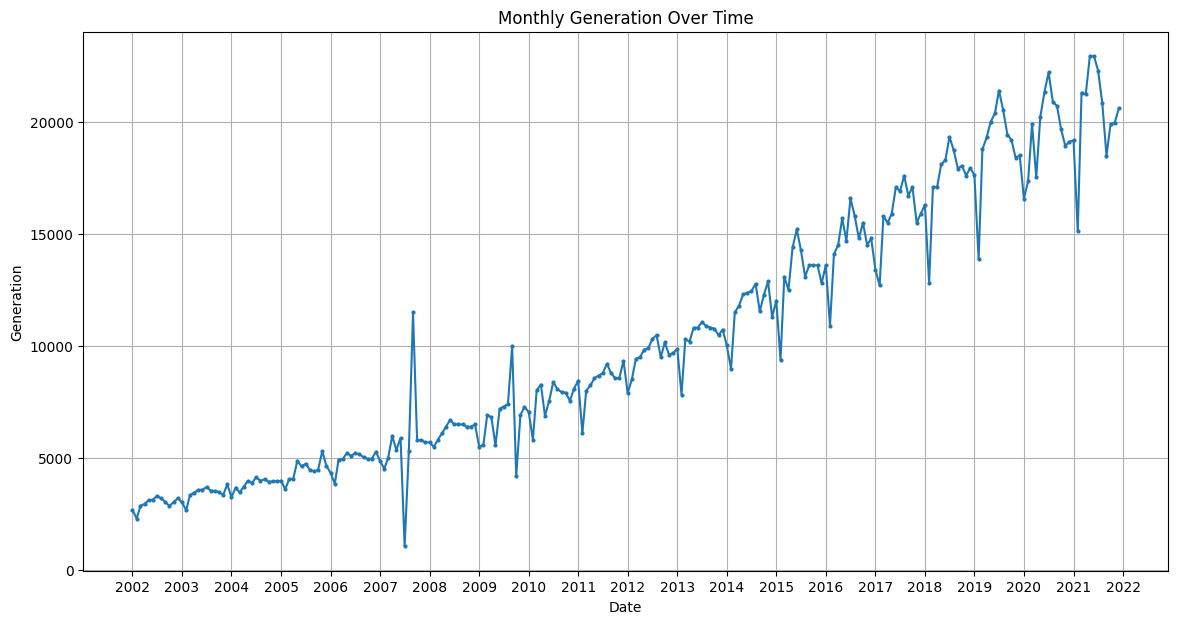

In [11]:
electricity_df_train['Date'] = pd.to_datetime(electricity_df_train['Date'])

plt.figure(figsize=(14, 7))
plt.plot(electricity_df_train['Date'], electricity_df_train['Generation'], marker='o', markersize=2)

# Setting x-axis ticks to display one tick per year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xlabel('Date')
plt.ylabel('Generation')
plt.title('Monthly Generation Over Time')

plt.grid(True)
plt.show()


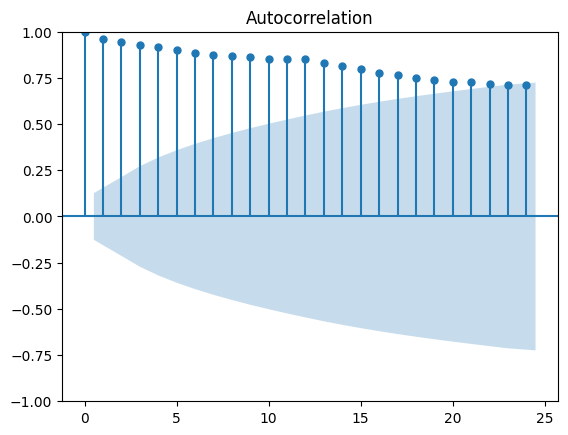

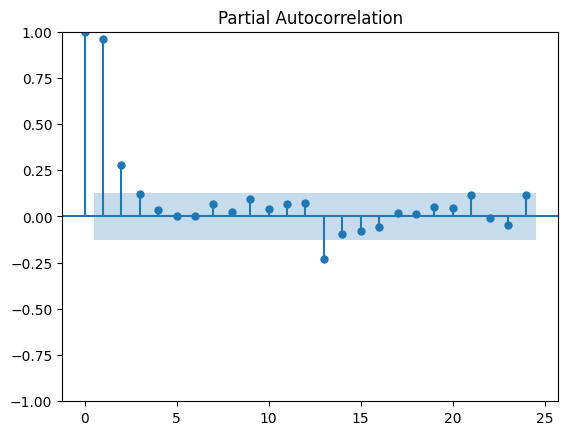

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'electricity_df' is your DataFrame
# Select the 'electricity' column
electricity_series_train = electricity_df_train['Generation']

# Plot ACF and PACF
acf_original = plot_acf(electricity_series_train)
pacf_original = plot_pacf(electricity_series_train)

In [14]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(electricity_series_train)
print(f'p-value: {adf_test[1]}')

p-value: 1.0


<Axes: >

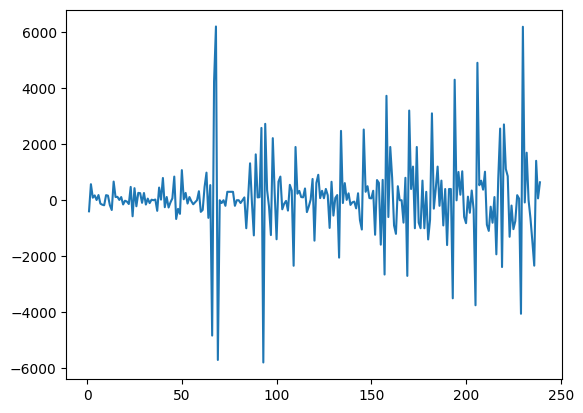

In [15]:
df_train_diff1 = electricity_series_train.diff().dropna()
df_train_diff1.plot()

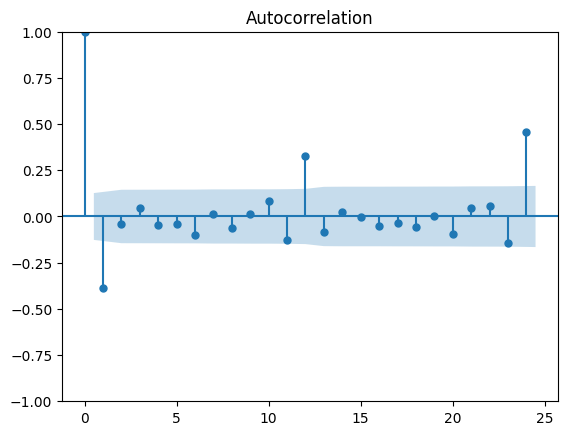

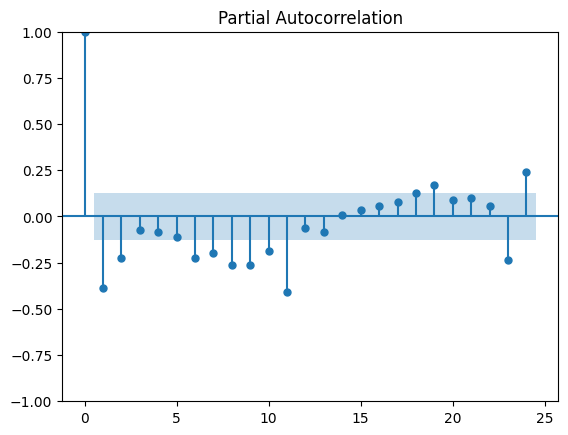

In [16]:
acf_diff1 = plot_acf(df_train_diff1)
pacf_diff1 = plot_pacf(df_train_diff1)

In [17]:
adf_test1 = adfuller(df_train_diff1)
print(f'p-value: {adf_test1[1]}')

p-value: 1.0683950287282046e-26


In [18]:
import pmdarima as pm

auto_arima = pm.auto_arima(electricity_series_train, 
                           start_p=0, start_q=0,
                           max_p=5, max_q=5,
                           start_P=0, start_D=0, start_Q=0,  # Các tham số mùa vụ ban đầu
                           max_P=3, max_D=1, max_Q=3,        # Giới hạn tham số mùa vụ
                           m=12,                             # Số giai đoạn mùa vụ, ví dụ 12 tháng cho một năm
                           seasonal=True,                    # Kích hoạt mô hình mùa vụ
                           d=1, D=None,                   # Cho phép auto_arima tự động tìm d và D
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(auto_arima.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4147.869, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4079.180, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4040.244, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4146.548, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=4079.708, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3956.222, Time=0.35 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3998.894, Time=0.29 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=3980.367, Time=0.86 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=3951.229, Time=0.80 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=4002.062, Time=0.50 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=3986.295, Time=1.06 sec
 ARIMA(0,1,1)(1,0,3)[12] intercept   : AIC=3973.693, Time=1.65 sec
 ARIMA(0,1,1)(0,0,3)[12] intercept   : AIC=3982.589, Time=1.41 sec
 ARIMA(0,1,1)(2,0,3)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,1,0)(1,0,2)[12]

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# Tạo mô hình SARIMA với các tham số tốt nhất
electricity_model = ARIMA(electricity_series_train, 
                     order=(0,1,1), 
                     seasonal_order=(1, 0, 2, 12), 
                     enforce_stationarity=False, 
                     enforce_invertibility=False)

# Huấn luyện mô hình
fitted_electricity_model = electricity_model.fit()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import joblib

# Lưu mô hình vào file
joblib.dump(fitted_electricity_model, path_electricity_sarima_model)

['D:\\Code\\BachKhoa\\Khoa Hoc Du Lieu\\eletricity-generation-predictor\\MODEL\\electricity_sarima.pkl']

In [22]:
electricity_series_test = electricity_df_test['Generation']

In [23]:
# Giả sử chỉ mục của train kết thúc ở 99 và test bắt đầu từ 100
# Đây là giả định, bạn cần kiểm tra dữ liệu cụ thể của mình
print("Last index of train data:", electricity_series_train.index[-1])
print("First index of test data:", electricity_series_test.index[0])

# Đặt lại chỉ mục cho test data để nó tiếp nối sau train data
start_index = electricity_series_train.index[-1] + 1  # bắt đầu sau index cuối của train
end_index = start_index + len(electricity_series_test)  # kết thúc sau đó bằng độ dài của test
electricity_series_test.index = range(start_index, end_index)

# Nối hai series
electricity_series = pd.concat([electricity_series_train, electricity_series_test])

# Hiển thị một số giá trị đầu và cuối để kiểm tra
print(electricity_series.head())
print(electricity_series.tail())


Last index of train data: 239
First index of test data: 0
0    2690.5
1    2294.9
2    2866.5
3    2956.6
4    3128.1
Name: Generation, dtype: float64
247    23328.649504
248    21598.011024
249    20972.991239
250    20504.230000
251    20648.624000
Name: Generation, dtype: float64


In [24]:
# Tải mô hình từ file
loaded_electricity_model = joblib.load(path_electricity_sarima_model)

electricity_series_prediction = loaded_electricity_model.forecast(len(electricity_series_test))

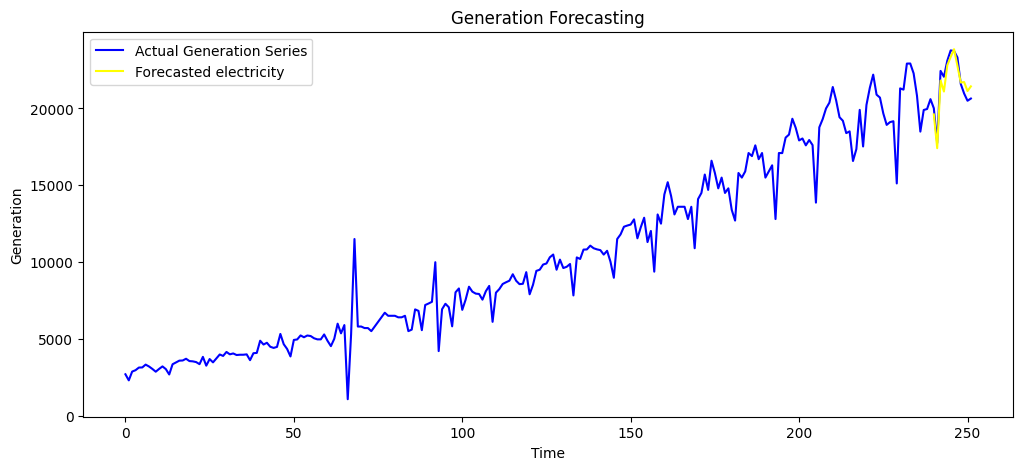

In [25]:
import matplotlib.pyplot as plt

# Tạo một biểu đồ để vẽ
plt.figure(figsize=(12, 5))

# Vẽ chuỗi dữ liệu thực tế
plt.plot(electricity_series, color='blue', label='Actual Generation Series')

# Vẽ chuỗi dự đoán
# Lưu ý: Cần cộng chỉ số bắt đầu của electricity_series_prediction để nó tiếp nối đúng với dữ liệu thực tế
prediction_index = range(len(electricity_series_train), len(electricity_series_train) + len(electricity_series_prediction))
plt.plot(prediction_index, electricity_series_prediction, color='yellow', label='Forecasted electricity')

# Thêm tiêu đề và nhãn
plt.title('Generation Forecasting')
plt.xlabel('Time')
plt.ylabel('Generation')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(electricity_series_test, electricity_series_prediction)
mape = mean_absolute_percentage_error(electricity_series_test, electricity_series_prediction)
rmse = np.sqrt(mean_squared_error(electricity_series_test, electricity_series_prediction))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 498.0189729638948
mape - manual: 0.023228358045816466
rmse - manual: 560.1476245264088
